In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [ ]:
pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 48.1 MB/s eta 0:00:00


# **Importing and Inspecting the Data**

In [ ]:
df = pd.read_csv('UPSTOtrain.csv')
df.columns = ['Reactant', 'Product']

#Check dataset shape
print(f"Dataset shape: {df.shape} (rows, columns)")

#Preview first few rows
print("\nFirst 5 rows:")
print(df.head())

#Column names
print("\nColumn names:")
print(df.columns.tolist())

#Missing values summary
print("\nMissing values per column:")
print(df.isnull().sum())

#Data types of each column
print("\nData types:")
print(df.dtypes)

#Summary statistics for numerical columns (if any)
print("\nSummary statistics:")
print(df.describe(include='all'))

#Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

#Check for inconsistencies: whitespace, empty strings
print("\nNumber of rows with blank (empty string) entries:")
blank_counts = (df == '').sum()
print(blank_counts)


Dataset shape: (7704, 2) (rows, columns)

First 5 rows:
                                            Reactant  \
0  C O C C Br . O = c 1 c ( O ) c n ( - c 2 c c c...   
1  C 1 C O C C N 1 . C c 1 c ( N C ( = O ) C Br )...   
2  Br P ( Br ) Br . C S ( = O ) ( = O ) c 1 c c c...   
3  C c 1 s c ( N C c 2 c c c c c 2 ) c ( C # N ) ...   
4  C C ( C ) ( C ) O C ( = O ) N C C ( C ) ( C ) ...   

                                             Product  
0  C O C C O c 1 c n ( - c 2 c c c c ( C ( F ) ( ...  
1  C c 1 c ( N C ( = O ) C N 2 C C O C C 2 ) c c ...  
2     C S ( = O ) ( = O ) c 1 c c c ( C Br ) c c 1 F  
3  C c 1 s c ( N ( C c 2 c c c c c 2 ) C ( = S ) ...  
4  C C ( C ) ( C N ) c 1 c c 2 c c ( N C ( = O ) ...  

Column names:
['Reactant', 'Product']

Missing values per column:
Reactant    0
Product     0
dtype: int64

Data types:
Reactant    object
Product     object
dtype: object

Summary statistics:
                                                 Reactant  \
count                 

In [ ]:
df

,Reactant,Product
0,C O C C Br . O = c 1 c ( O ) c n ( - c 2 c c c...,C O C C O c 1 c n ( - c 2 c c c c ( C ( F ) ( ...
1,C 1 C O C C N 1 . C c 1 c ( N C ( = O ) C Br )...,C c 1 c ( N C ( = O ) C N 2 C C O C C 2 ) c c ...
2,Br P ( Br ) Br . C S ( = O ) ( = O ) c 1 c c c...,C S ( = O ) ( = O ) c 1 c c c ( C Br ) c c 1 F
3,C c 1 s c ( N C c 2 c c c c c 2 ) c ( C # N ) ...,C c 1 s c ( N ( C c 2 c c c c c 2 ) C ( = S ) ...
4,C C ( C ) ( C ) O C ( = O ) N C C ( C ) ( C ) ...,C C ( C ) ( C N ) c 1 c c 2 c c ( N C ( = O ) ...
...,...,...
7699,C C O C ( = O ) N c 1 n c 2 c c c ( C ) c c 2 ...,C O c 1 n c 2 c c ( C ) c c c 2 n c 1 N C ( = ...
7700,C C ( C ) ( C ) c 1 c c c c ( O ) c 1 . C c 1 ...,C c 1 c c ( [N+] ( = O ) [O-] ) c n c 1 O c 1 ...
7701,C O C c 1 c c c c ( C ( = O ) c 2 n n n n 2 C ...,C O C c 1 c c c c ( C ( = N O ) c 2 n n n n 2 ...
7702,C C ( C ) ( C ) O C ( = O ) N 1 C C C ( = O ) ...,C n 1 c c n c 1 C 1 ( O ) C C N ( C ( = O ) O ...


Issues:-


*  SMILES Strings Are Spaced Out
*  62 duplicate reactions



In [ ]:
# Clean spaces from SMILES strings
df['Reactant'] = df['Reactant'].str.replace(' ', '', regex=False)
df['Product'] = df['Product'].str.replace(' ', '', regex=False)

# Drop duplicates
df = df.drop_duplicates()



In [ ]:
df

# **EDA Tasks for Reaction Prediction Model**
# 1.Number of molecules per reactant - to see if most reactions are single- or multi-molecule.



In [ ]:
df['Reactant_num'] = df['Reactant'].apply(lambda x: len(x.split('.')))
df


/tmp/ipython-input-8-1982629996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reactant_num'] = df['Reactant'].apply(lambda x: len(x.split('.')))


,Reactant,Product,Reactant_num
0,COCCBr.O=c1c(O)cn(-c2cccc(C(F)(F)F)c2)nc1-c1cc...,COCCOc1cn(-c2cccc(C(F)(F)F)c2)nc(-c2ccnn2-c2cc...,2
1,C1COCCN1.Cc1c(NC(=O)CBr)cccc1[N+](=O)[O-],Cc1c(NC(=O)CN2CCOCC2)cccc1[N+](=O)[O-],2
2,BrP(Br)Br.CS(=O)(=O)c1ccc(CO)cc1F,CS(=O)(=O)c1ccc(CBr)cc1F,2
3,Cc1sc(NCc2ccccc2)c(C#N)c1C.O=C(N=C=S)c1ccccc1,Cc1sc(N(Cc2ccccc2)C(=S)NC(=O)c2ccccc2)c(C#N)c1C,2
4,CC(C)(C)OC(=O)NCC(C)(C)c1cc2cc(NC(=O)C3(c4ccc5...,CC(C)(CN)c1cc2cc(NC(=O)C3(c4ccc5c(c4)OCO5)CC3)...,1
...,...,...,...
7699,CCOC(=O)Nc1nc2ccc(C)cc2nc1OC.Clc1ccccc1N1CCNCC1,COc1nc2cc(C)ccc2nc1NC(=O)N1CCN(c2ccccc2Cl)CC1,2
7700,CC(C)(C)c1cccc(O)c1.Cc1cc([N+](=O)[O-])cnc1Cl,Cc1cc([N+](=O)[O-])cnc1Oc1cccc(C(C)(C)C)c1,2
7701,COCc1cccc(C(=O)c2nnnn2C)c1.NO,COCc1cccc(C(=NO)c2nnnn2C)c1,2
7702,CC(C)(C)OC(=O)N1CCC(=O)CC1.Cn1ccnc1,Cn1ccnc1C1(O)CCN(C(=O)OC(C)(C)C)CC1,2


In [ ]:
df['Reactant_num'].value_counts()


,count
Reactant_num,
2,5599
1,1932
3,102
4,8
5,1


# 2. Length of reactant and product SMILES - to check text complexity of input vs output.

In [ ]:
df['Reactant_len'] = df['Reactant'].apply(len)
df['Product_len'] = df['Product'].apply(len)
avg_reactant = df['Reactant_len'].mean()
avg_product = df['Product_len'].mean()
print(f'Average reactant length: {avg_reactant}')
print(f'Average product length: {avg_product}')

Average reactant length: 47.517534676786184
Average product length: 41.20073279246271


# 3.Distribution of Molecular Properties

In [ ]:
def get_mols(smiles):
    return [Chem.MolFromSmiles(s) for s in smiles.split('.') if Chem.MolFromSmiles(s)]
df['reactant_mols'] = df['Reactant'].apply(get_mols)
df['product_mol'] = df['Product'].apply(lambda x: Chem.MolFromSmiles(x))

#Takes a SMILES string that might represent multiple molecules separated by "."
#Splits the string into individual molecule SMILES (e.g., "CCO.O=C=O" → "CCO", "O=C=O")
#Applies Chem.MolFromSmiles(s) from RDKit to convert each into a Mol object
#Filters out invalid SMILES (i.e., if MolFromSmiles returns None)

In [ ]:
def total_mol_property(mols, prop_fn):
    return sum(prop_fn(m) for m in mols if m)
#if a reactant has 2 molecules, their property values are added together

df['reactant_MW'] = df['reactant_mols'].apply(lambda mols: total_mol_property(mols, Descriptors.MolWt))
#Total molecular weight of all reactants in a reaction

df['product_MW'] = df['product_mol'].apply(Descriptors.MolWt)
#Molecular weight of the single product molecule

df['reactant_LogP'] = df['reactant_mols'].apply(lambda mols: total_mol_property(mols, Descriptors.MolLogP))
#Total LogP (lipophilicity) of all reactants

df['product_LogP'] = df['product_mol'].apply(Descriptors.MolLogP)
# LogP of the product

In [ ]:
df.tail()

,Reactant,Product,Reactant_num,Reactant_len,Product_len,reactant_mols,product_mol,reactant_MW,product_MW,reactant_LogP,product_LogP
7699,CCOC(=O)Nc1nc2ccc(C)cc2nc1OC.Clc1ccccc1N1CCNCC1,COc1nc2cc(C)ccc2nc1NC(=O)N1CCN(c2ccccc2Cl)CC1,2,47,45,[<rdkit.Chem.rdchem.Mol object at 0x7a2e9d1530...,<rdkit.Chem.rdchem.Mol object at 0x7a2e9d03a0a0>,457.962,411.893,4.26482,3.95432
7700,CC(C)(C)c1cccc(O)c1.Cc1cc([N+](=O)[O-])cnc1Cl,Cc1cc([N+](=O)[O-])cnc1Oc1cccc(C(C)(C)C)c1,2,45,42,[<rdkit.Chem.rdchem.Mol object at 0x7a2e9d1531...,<rdkit.Chem.rdchem.Mol object at 0x7a2e9d03a110>,322.792,286.331,4.64132,4.38802
7701,COCc1cccc(C(=O)c2nnnn2C)c1.NO,COCc1cccc(C(=NO)c2nnnn2C)c1,2,29,27,[<rdkit.Chem.rdchem.Mol object at 0x7a2e9d1532...,<rdkit.Chem.rdchem.Mol object at 0x7a2e9d03a180>,265.273,247.258,-0.07820,0.58310
7702,CC(C)(C)OC(=O)N1CCC(=O)CC1.Cn1ccnc1,Cn1ccnc1C1(O)CCN(C(=O)OC(C)(C)C)CC1,2,35,35,[<rdkit.Chem.rdchem.Mol object at 0x7a2e9d1533...,<rdkit.Chem.rdchem.Mol object at 0x7a2e9d03a1f0>,281.356,281.356,2.00650,1.63860
7703,Brc1cn[nH]c1.CC(C)(C)C(=O)Nc1ncccc1I,CC(C)(C)C(=O)Nc1ncccc1-n1cc(Br)cn1,2,36,34,[<rdkit.Chem.rdchem.Mol object at 0x7a2e9d1534...,<rdkit.Chem.rdchem.Mol object at 0x7a2e9d03a260>,451.106,323.194,3.84300,3.01440


# 4.Visualization

<Axes: xlabel='reactant_MW', ylabel='Count'>

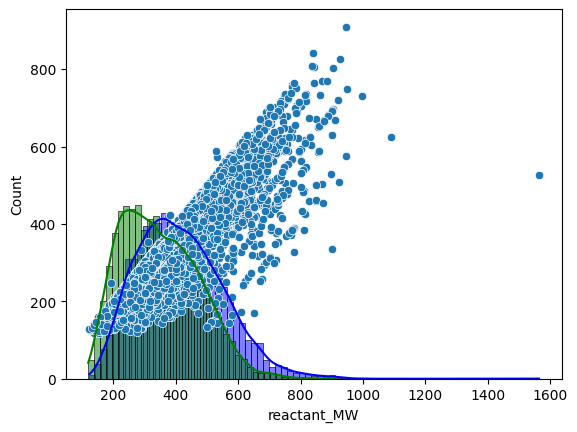

In [ ]:
sns.histplot(df['reactant_MW'], kde=True, color='blue')
sns.histplot(df['product_MW'], kde=True, color='green')

sns.scatterplot(x='reactant_MW', y='product_MW', data=df)

Interpretation:


*   The dataset contains mostly smaller to mid-size molecules.
*   A few molecules have very high molecular weights (up to ~1600 Da), but they are rare (outliers).
*   The distribution is not normal, it's positively skewed.










# 5.Methods to Detect Outliers

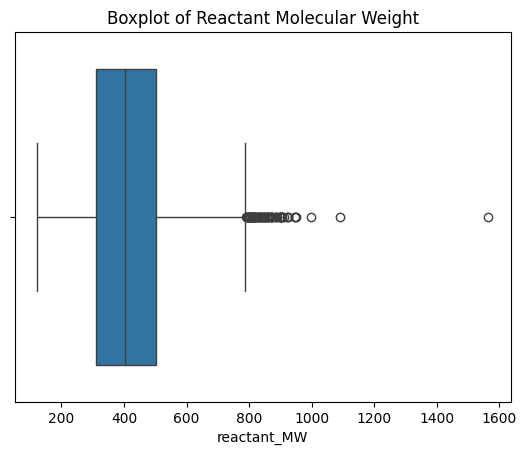

In [ ]:
sns.boxplot(x=df['reactant_MW'])
plt.title('Boxplot of Reactant Molecular Weight')
plt.show()

In [ ]:
#1. Z-score Method: Outliers are points more than 3 standard deviations from the mean.


df['reactant_zscore'] = zscore(df['reactant_MW'])
outliers_z = df[abs(df['reactant_zscore']) > 3]

#2. IQR Method (Interquartile Range): Outliers lie below Q1 - 1.5×IQR or above Q3 + 1.5×IQR.
Q1 = df['reactant_MW'].quantile(0.25)
Q3 = df['reactant_MW'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['reactant_MW'] < lower_bound) | (df['reactant_MW'] > upper_bound)]



Outliers in chemical datasets (e.g., extreme molecular weights or LogP values) can significantly affect data analysis and model performance. Handling them depends on the context and purpose:


* Keep the Outliers
Retain them if they represent valid, rare chemical cases or if full data variability is needed for exploratory analysis.
* Remove the Outliers
Eliminate extreme values if they stem from data entry or parsing errors, or to improve the robustness of sensitive ML models.
* Cap or Winsorize
Replace extreme values with defined percentile-based limits to reduce their influence without removing data
*Apply Transformations
Use transformations (like log, sqrt) to reduce skewness in molecular descriptors and stabilize variance
* Use Robust Models
Algorithms like Random Forests or Gradient Boosted Trees handle outliers better without preprocessing.







# 6 .Data Quality Checks

In [ ]:
df['reactant_valid'] = df['reactant_mols'].apply(lambda mols: all(m is not None for m in mols))
df['product_valid'] = df['product_mol'].apply(lambda m: m is not None)

invalid_rows = df[~df['reactant_valid'] | ~df['product_valid']]
print(f"Invalid rows: {len(invalid_rows)}")


Invalid rows: 0
